# Análise de indicadores

#### Para auxiliar a tomada de decisão do nosso modelo preditivo, optamos por 3 indicadores técnicos que buscam fornecer informações sobre a direção provável do movimento de preços e a força do mercado. São eles:

*   Bollinger Bands
*   Índice de Força Relativa (RSI)
*   Moving Average Convergence Divergence (MACD)

#### Mais abaixo no notebook, veremos como eles são aplicados.





In [2]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import confusion_matrix

In [3]:
# Dados Ibovespa

ibovespa = "^BVSP"

dados_ibovespa = yf.download(ibovespa, start="2000-01-01", end="2023-07-31")

df = pd.DataFrame(dados_ibovespa)
df = df.reset_index()

df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,17098.0,17408.0,16719.0,16930.0,16930.0,0
1,2000-01-04,16908.0,16908.0,15851.0,15851.0,15851.0,0
2,2000-01-05,15871.0,16302.0,15350.0,16245.0,16245.0,0
3,2000-01-06,16237.0,16499.0,15977.0,16107.0,16107.0,0
4,2000-01-07,16125.0,16449.0,16125.0,16309.0,16309.0,0


In [10]:
len(df.loc[df['Volume'] == 0])

1713

# Bollinger Bands

#### A utilização das Bandas de Bollinger em nosso modelo visa identificar momentos de alta volatilidade e possíveis pontos de reversão. Isso é essencial para entender os cenários em que o mercado pode estar passando por mudanças substanciais, permitindo-nos ajustar nossas previsões para refletir a volatilidade atual.

In [12]:
# 1. Bandas de Bollinger
def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()

    upper_band = rolling_mean + num_std * rolling_std
    lower_band = rolling_mean - num_std * rolling_std

    return upper_band, lower_band

upper_band, lower_band = calculate_bollinger_bands(df['Close'])
df['Upper_Band'] = upper_band
df['Lower_Band'] = lower_band

df.head(50)

,Date,Open,High,Low,Close,Adj Close,Volume,Upper_Band,Lower_Band
0,2000-01-03,17098.0,17408.0,16719.0,16930.0,16930.0,0,NaN,NaN
1,2000-01-04,16908.0,16908.0,15851.0,15851.0,15851.0,0,NaN,NaN
2,2000-01-05,15871.0,16302.0,15350.0,16245.0,16245.0,0,NaN,NaN
3,2000-01-06,16237.0,16499.0,15977.0,16107.0,16107.0,0,NaN,NaN
4,2000-01-07,16125.0,16449.0,16125.0,16309.0,16309.0,0,NaN,NaN
5,2000-01-10,16325.0,17057.0,16325.0,17022.0,17022.0,0,NaN,NaN
6,2000-01-11,17045.0,17197.0,16573.0,16573.0,16573.0,0,NaN,NaN
7,2000-01-12,16574.0,16724.0,16331.0,16617.0,16617.0,0,NaN,NaN
8,2000-01-13,16663.0,17715.0,16663.0,17298.0,17298.0,0,NaN,NaN
9,2000-01-14,17306.0,17800.0,17306.0,17658.0,17658.0,0,NaN,NaN


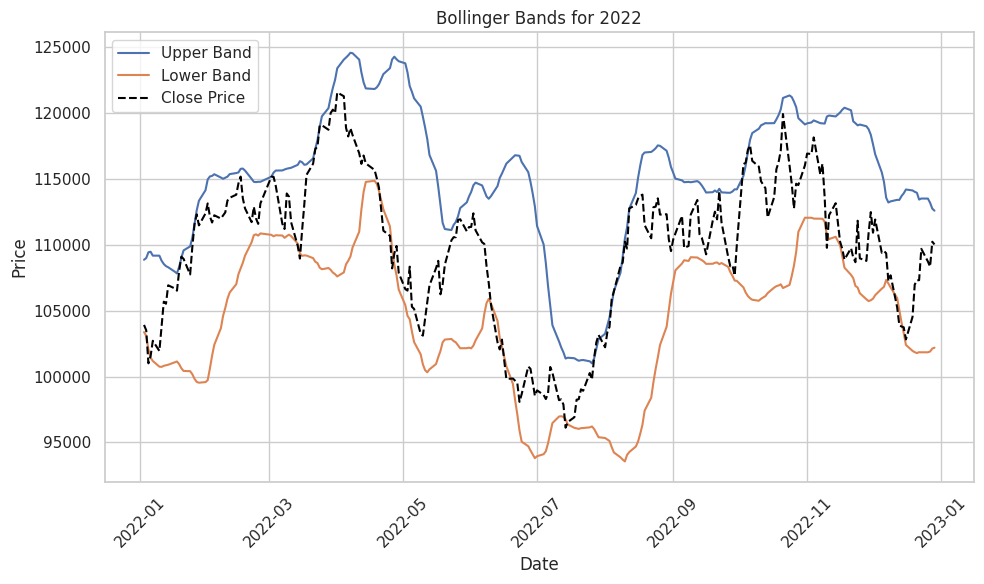

In [13]:
# Filtrando os dados apenas para o ano de 2022
df['Date'] = pd.to_datetime(df['Date'])
df_2022 = df[(df['Date'] >= '2022-01-01') & (df['Date'] <= '2022-12-31')]

# Configurações do Seaborn
sns.set(style="whitegrid")

# Plotando as Bandas de Bollinger para o ano de 2022 usando Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_2022, x='Date', y='Upper_Band', label='Upper Band')
sns.lineplot(data=df_2022, x='Date', y='Lower_Band', label='Lower Band')
sns.lineplot(data=df_2022, x='Date', y='Close', label='Close Price', linestyle='dashed', color='black')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands for 2022')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Tomando como exemplo o gráfico de 2022, a partir da análise com bandas de bollinger podem nos indicar sinais de reversão da tendência atual. Quando o volume de fechamento ultrapassa uma das bandas, isso pode indicar uma possível reversão da tendência atual. Por exemplo, uma quebra acima da Banda de Bollinger superior pode sugerir uma possível reversão para baixa volatilidade ou uma mudança na tendência de baixa para alta.

# Índice de Força Relativa (RSI)

#### Optamos por utilizá-lo para auxiliar o nosso modelo a nos fornecer insights sobre a força de uma tendência, indicando em quais momentos a IBOVESPA estava em momentos de "sobrecomprado" (potencialmente devido a uma alta excessiva) ou "sobrevendido" (possivelmente causado por uma queda excessiva nos preços).

#### Ao incorporar o RSI em nosso modelo, buscamos capturar possíveis reversões de tendência com base nas condições de sobrecompra e sobrevenda, permitindo que nosso modelo identifique esses pontos e ajuste suas previsões.

In [14]:
# 2. RSI (Relative Strength Index)
def calculate_rsi(data, period=20):
    delta = data.diff()

    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

df['RSI'] = calculate_rsi(df['Close'])

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Upper_Band,Lower_Band,RSI
0,2000-01-03,17098.0,17408.0,16719.0,16930.0,16930.0,0,NaN,NaN,NaN
1,2000-01-04,16908.0,16908.0,15851.0,15851.0,15851.0,0,NaN,NaN,NaN
2,2000-01-05,15871.0,16302.0,15350.0,16245.0,16245.0,0,NaN,NaN,NaN
3,2000-01-06,16237.0,16499.0,15977.0,16107.0,16107.0,0,NaN,NaN,NaN
4,2000-01-07,16125.0,16449.0,16125.0,16309.0,16309.0,0,NaN,NaN,NaN


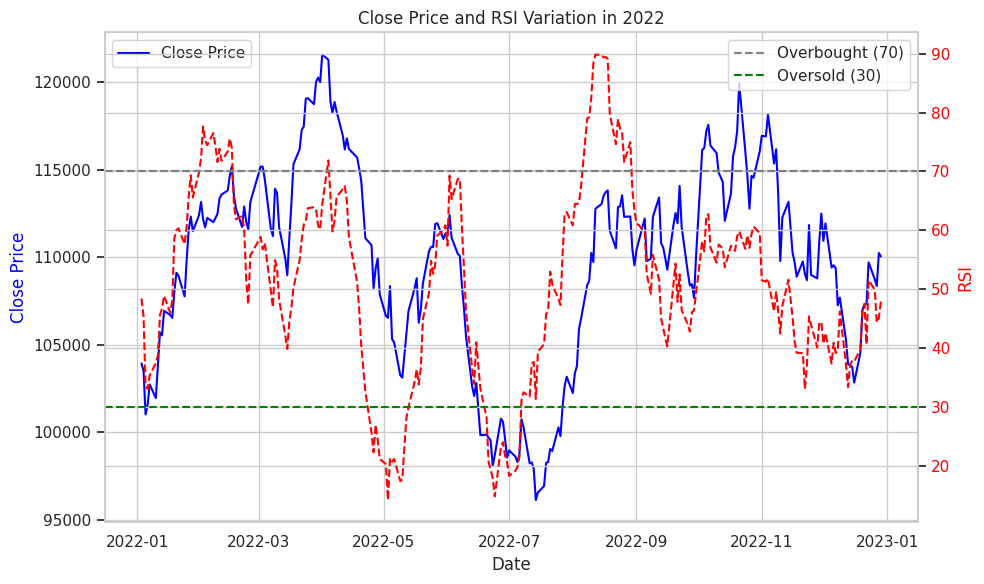

In [15]:
# Filtrando os dados apenas para o ano de 2022
df_2022 = df[df['Date'].dt.year == 2022]

# Configurações do Seaborn
sns.set(style="whitegrid")

# Criando a figura com os dois gráficos
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotando o gráfico de linha para o fechamento (Close) em 2022
sns.lineplot(data=df_2022, x='Date', y='Close', color='blue', label='Close Price')

# Configurações para o eixo do RSI
ax2 = ax1.twinx()
sns.lineplot(data=df_2022, x='Date', y='RSI', color='red', linestyle='dashed', ax=ax2)
ax2.set_ylabel('RSI', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adicionando as linhas horizontais para os níveis de sobrecompra e sobrevenda no eixo do RSI
ax2.axhline(y=70, color='gray', linestyle='--', label='Overbought (70)')
ax2.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')

# Configurações gerais
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax2.legend(loc='upper right')  # Posiciona a legenda no canto superior direito
ax1.legend(loc='upper left')
ax1.set_title('Close Price and RSI Variation in 2022')
ax1.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### O RSI é varia entre 0 e 100. Tradicionalmente, valores acima de 70 indicam uma condição de sobrecompra, sugerindo que o ativo pode estar prestes a sofrer uma reversão de baixa. Valores abaixo de 30 indicam uma condição de sobrevenda, sugerindo que o ativo pode estar prestes a se recuperar.

# Moving Average Convergence Divergence (MACD)

#### Utilizamos o MACD para obter informações sobre a relação das médias móveis, indicando a força e a direção de uma tendência atual.  Além disso, conseguimos obter o dado de velocidade com que ela está se desenvolvendo. Isso nos permite ajustar nossas previsões com base em mudanças abruptas ou gradualidades na evolução dos preços, contribuindo para uma compreensão mais abrangente da dinâmica do mercado.

In [16]:
# 3. MACD (Moving Average Convergence Divergence)
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, min_periods=1, adjust=False).mean()
    long_ema = data.ewm(span=long_window, min_periods=1, adjust=False).mean()

    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, min_periods=1, adjust=False).mean()

    return macd, signal_line

macd, signal_line = calculate_macd(df['Close'])
df['MACD'] = macd
df['Signal_Line'] = signal_line

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Upper_Band,Lower_Band,RSI,MACD,Signal_Line
0,2000-01-03,17098.0,17408.0,16719.0,16930.0,16930.0,0,NaN,NaN,NaN,0.000000,0.000000
1,2000-01-04,16908.0,16908.0,15851.0,15851.0,15851.0,0,NaN,NaN,NaN,-86.074074,-17.214815
2,2000-01-05,15871.0,16302.0,15350.0,16245.0,16245.0,0,NaN,NaN,NaN,-121.099926,-37.991837
3,2000-01-06,16237.0,16499.0,15977.0,16107.0,16107.0,0,NaN,NaN,NaN,-158.170324,-62.027534
4,2000-01-07,16125.0,16449.0,16125.0,16309.0,16309.0,0,NaN,NaN,NaN,-169.297612,-83.481550


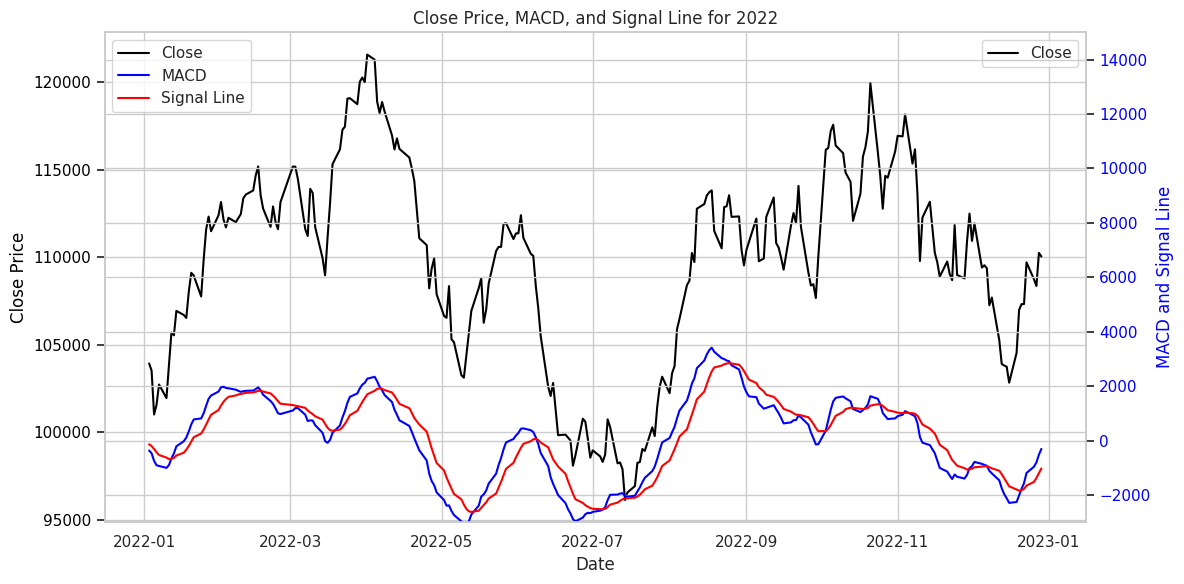

In [17]:
# Filtrando os dados apenas para o ano de 2022
df_2022 = df[df['Date'].dt.year == 2022]

# Configurações do Seaborn
sns.set(style="whitegrid")

# Criando a figura
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotando o Close no eixo esquerdo
sns.lineplot(data=df_2022, x='Date', y='Close', ax=ax1, label='Close', color='black')
ax1.set_ylabel('Close Price', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Criando um segundo eixo Y para o MACD e Signal Line
ax2 = ax1.twinx()

# Plotando o MACD e a linha de sinal no eixo direito
sns.lineplot(data=df_2022, x='Date', y='MACD', ax=ax2, label='MACD', color='blue')
sns.lineplot(data=df_2022, x='Date', y='Signal_Line', ax=ax2, label='Signal Line', color='red')
ax2.set_ylabel('MACD and Signal Line', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Configurando limite do eixo direito
ax2.set_ylim([-3000, 15000])

# Configurando rótulos e título
plt.title('Close Price, MACD, and Signal Line for 2022')
plt.xlabel('Date')

# Adicionando legenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Ajustando layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

##### Quando há cruzamentos entre o MACD e a linha de sinal (o MACD cruza acima ou abaixo da linha de sinal) e esse cruzamento coincide com movimentos significativos no preço de fechamento, isso pode ser considerado um sinal mais forte. Por exemplo, se o MACD cruzar acima da linha de sinal ao mesmo tempo em que o preço de fechamento está subindo, isso pode indicar uma possível tendência de alta mais forte.

# Criando o TARGET



In [18]:
# Criar uma coluna que calcula a diferença entre o fechamento do dia seguinte e o fechamento atual
df['Close_Diff'] = df['Close'].shift(-1) - df['Close']

# Criar uma coluna 'Direction' que será 1 se a diferença for positiva (fechamento do dia seguinte acima) e 0 caso contrário
df['Direction'] = (df['Close_Diff'] > 0).astype(int)

# Remover a coluna de diferença, pois não será mais necessária
df.drop(columns=['Close_Diff'], inplace=True)

# Visualizar as primeiras linhas do DataFrame com o novo target
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Upper_Band,Lower_Band,RSI,MACD,Signal_Line,Direction
0,2000-01-03,17098.0,17408.0,16719.0,16930.0,16930.0,0,NaN,NaN,NaN,0.000000,0.000000,0
1,2000-01-04,16908.0,16908.0,15851.0,15851.0,15851.0,0,NaN,NaN,NaN,-86.074074,-17.214815,1
2,2000-01-05,15871.0,16302.0,15350.0,16245.0,16245.0,0,NaN,NaN,NaN,-121.099926,-37.991837,0
3,2000-01-06,16237.0,16499.0,15977.0,16107.0,16107.0,0,NaN,NaN,NaN,-158.170324,-62.027534,1
4,2000-01-07,16125.0,16449.0,16125.0,16309.0,16309.0,0,NaN,NaN,NaN,-169.297612,-83.481550,1
